<a href="https://colab.research.google.com/github/anamarijaeres/Analysis-of-the-Relationship-between-Movie-Titles-and-Corresponding-Ratings-and-Reviews/blob/main/4_1_4_Correlation_between_the_type_of_words_in_the_title_and_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/My Drive/dataset.xlsx')

In [ ]:
df.columns
df=df.drop(['"imdbID"'], axis=1) 
df=df.drop(['"mov_galaxy_ID"'], axis=1) 
df.head()

,"""title""","""rating"""
0,"""10 Things I Hate About You""","""7.2"""
1,"""12 and Holding""","""7.6"""
2,"""127 Hours""","""7.6"""
3,"""1492: Conquest of Paradise""","""6.5"""
4,"""15 Minutes""","""6.1"""


In [ ]:
list_names= df['"title"'].tolist()
list_names[:3]

['"10 Things I Hate About You"', '"12 and Holding"', '"127 Hours"']

Link : https://opensenselabs.com/blog/tech/entity-extraction-using-nlp-python

sentence segmentation --> tokenization --> part of speech tagging --> entity extraction 


In [ ]:
import nltk.tokenize as nt
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import numpy as np 

#list of names without double ""
list_clear_names=[]
for i in list_names:
  name=''
  for j in i:
    if j!= "\"":
      #print(j)
      name+=j
  list_clear_names.append(name)

text=list_clear_names[0]
print(text)

inputs=[]
inputs_str=[]
for text in list_clear_names:
  array=[]
  str1=''
  #split the text into the list of string
  ss=nt.sent_tokenize(text)
  #split the sentences into even smaller parts called 'tokens'
  tokenized_sent=[nt.word_tokenize(sent) for sent in ss]
  #'Part of Speech' tagging is the most complex task in entity extraction. 
  #The idea is to match the tokens with the corresponding tags (nouns, verbs, adjectives, adverbs, etc.).
  pos_sentences=[nltk.pos_tag(sent) for sent in tokenized_sent]
  #pos_sentences
  #print(pos_sentences)
  for sen in pos_sentences[0]:
    str1+=sen[1]+" "
    array.append(sen[1])
  inputs.append(array)
  inputs_str.append(str1)
  #print(pos_sentences[0])
  #print(pos_sentences[0][0])
  #print(pos_sentences[0][0][1])

#The collection of tags used for a particular task is known as a tag set for example: CD NNS PRP VBP IN PRP 
print(inputs[:3])
print(inputs_str[:3])

10 Things I Hate About You
[['CD', 'NNS', 'PRP', 'VBP', 'IN', 'PRP'], ['CD', 'CC', 'VBG'], ['CD', 'NNS']]
['CD NNS PRP VBP IN PRP ', 'CD CC VBG ', 'CD NNS ']


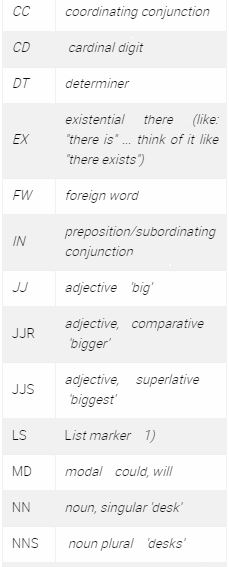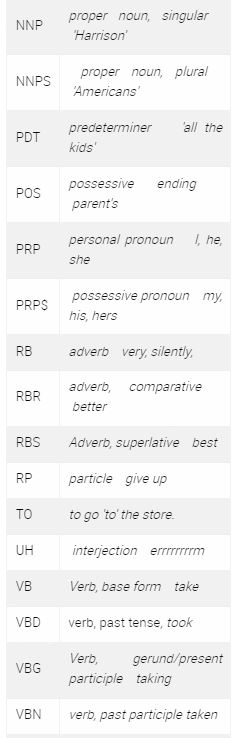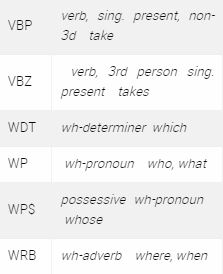

In [ ]:
X_val_numpy=np.array(inputs_str[:100])
x_val_tensor = tf.convert_to_tensor(X_val_numpy)
x_test_numpy=np.array(inputs_str[100:200])
x_test=tf.convert_to_tensor(x_test_numpy)
partial_x_train_numpy=np.array(inputs_str[200:])
partial_x_train = tf.convert_to_tensor(partial_x_train_numpy)
X_val_numpy

array(['CD NNS PRP VBP IN PRP ', 'CD CC VBG ', 'CD NNS ',
       'CD : NNP IN NNP ', 'CD NNS ', 'CD NN ', 'CD NNP NNP ',
       'CD : DT NNP NNP ', 'CD ', 'CD JJ NNP ', 'CD NNP . ',
       '( CD ) NNPS IN NNP ', 'CD ', 'DT JJ JJ NN ', 'IN DT NN ',
       'NNP NNP ', 'DT NNP ', 'NNP NNP : NNP NNP ', 'NN . ',
       'DT NNP NNP ', 'DT NNP IN NNP NNP IN DT CD NN ', 'NN ', 'NN ',
       'NNS IN NNP ', 'NNP NNP CD ', 'NN . ', 'NNP NNP : DT NN ', 'NN ',
       'NN : NN ', 'DT NN ', 'NN : NNP NN . ', 'NN : NN ', 'NNS ',
       'DT IN NNP ', 'DT IN NNP ', 'RB JJ ', 'RB IN DT NNP ', 'NN ',
       'NNP NN NN NN NNP ', 'NNP NNP ', 'NNP NNP ', 'JJ NNP NN ',
       'NNP NNP ', 'DT NNP NNP ', 'NNP NNP ', 'NNP NNP ', 'NNP NNP ',
       'DT JJ NNP IN NNP ', 'DT NN ', 'NN DT ', 'IN DT ', 'NN ',
       'NNP NNP ', 'NNS CC NNS ', 'NNP NNP ', 'DT NNP NNP ', 'JJ ', 'NN ',
       'DT NN ', 'NN RB ', 'NNP NNP ', 'NNP IN NNP ', 'RB JJ IN PRP VBZ ',
       'NNS ', 'DT NN ', 'IN NNP NNP ', 'JJ NNS : NNP NNP IN 

In [ ]:
list_ratings= df['"rating"'].tolist()
list_ratings[:3]
list_int_ratings=[]
list_float_ratings_linear=[]
for i in list_ratings:
  num=''
  for j in i:
    if j!= "\"":
      #print(j)
      num+=j
 # print(num)
  if num=="?":
    num='5'
  rating=int(round(float(num)))
  rating_linear=float(num)
  #print(rating)
  list_int_ratings.append([rating])
  list_float_ratings_linear.append([rating_linear])

list_int_ratings_numpy= np.array(list_int_ratings)
list_float_ratings_numpy_linear= np.array(list_float_ratings_linear)
list_int_ratings_numpy[:3]

array([[7],
       [8],
       [8]])

In [ ]:
y_val_numpy=np.array(list_int_ratings_numpy[:100])
y_val_tensor = tf.convert_to_tensor(np.array(list_int_ratings_numpy[:100]))
y_test_numpy=np.array(list_int_ratings_numpy[100:200])
y_test= tf.convert_to_tensor(y_test_numpy)
partial_y_train_numpy=np.array(list_int_ratings_numpy[200:])
partial_y_train = tf.convert_to_tensor(np.array(list_int_ratings_numpy[200:]))

y=list_int_ratings_numpy[:]

In [ ]:
#possible POS tags:
array_of_tags=['CC','CD','DT','EX','FW','IN', 'JJ', 'JJR','JJS','LS', 'MD', 'NN', 'NNS','NNP', 'NNPS', 'PDT','POS', 'PRP','PRP$','RB','RBR','RBS',
               'RP','TO','UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ' , 'WDT', 'WP', 'WP$', 'WRB']

array_of_ratings=[]
array_of_ratings_counter=[]
for r in array_of_tags:
  array_of_ratings.append(0)
  array_of_ratings_counter.append(0)


for ind,tag in enumerate(array_of_tags): 
  for ind2,sentance in enumerate(inputs):
    for word in sentance:
      if word==tag:
        array_of_ratings_counter[ind]+=1
        array_of_ratings[ind]+=y[ind2]

for i, _ in enumerate(array_of_tags):
  if array_of_ratings_counter[i]!=0:
    array_of_ratings[i]=array_of_ratings[i]/array_of_ratings_counter[i]

print(array_of_ratings[:20])
    


[array([6.92592593]), array([6.6097561]), array([6.97674419]), array([8.]), array([6.66666667]), array([6.94736842]), array([6.93506494]), 0, array([6.66666667]), 0, array([7.33333333]), array([6.9540636]), array([7.06796117]), array([6.98030635]), array([6.33333333]), 0, array([6.58333333]), array([6.71428571]), array([7.]), array([6.27777778])]


Graph that shows the average rating of a movie if a title has specific POS tag

/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


Text(0.5, 1.0, 'POS tag')

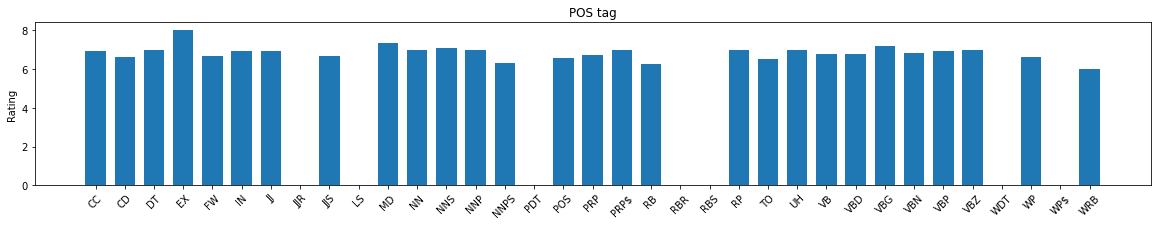

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3)) 
y_pos = np.arange(len(array_of_tags))
plt.bar(y_pos, array_of_ratings,0.7, align='center', alpha=1)
plt.xticks(rotation=45)
plt.xticks(y_pos, array_of_tags)
plt.ylabel('Rating')
plt.title('POS tag')

Graph shows how many specific POS tags have movies rated with rating 9 

[0, 1, 19, 0, 0, 7, 2, 0, 1, 0, 0, 8, 4, 38, 0, 0, 1, 2, 0, 0]


Text(0.5, 1.0, 'POS tag')

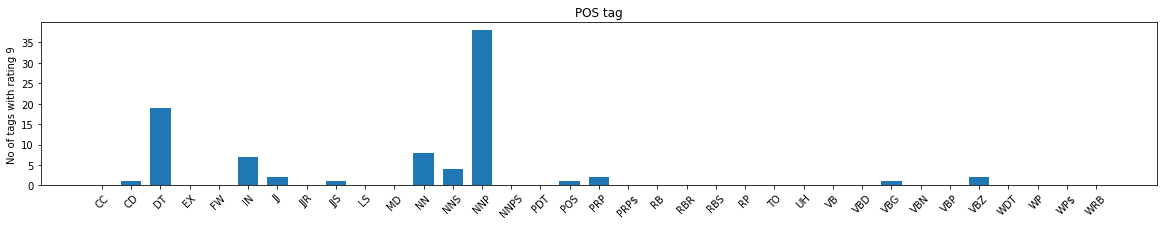

In [ ]:
array_for_nines=[]
array_for_eights=[]
array_for_sevens=[]
array_for_sixes=[]
for r in array_of_tags:
  array_for_nines.append(0)
  array_for_eights.append(0)
  array_for_sevens.append(0)
  array_for_sixes.append(0)

for ind2,sentance in enumerate(inputs):
  if y[ind2]==9:
    for word in sentance:
      for ind,tag in enumerate(array_of_tags): 
        if word==tag:
          array_for_nines[ind]+=1
  if y[ind2]==8:
    for word in sentance:
      for ind,tag in enumerate(array_of_tags): 
        if word==tag:
          array_for_eights[ind]+=1
  if y[ind2]==7:
    for word in sentance:
      for ind,tag in enumerate(array_of_tags): 
        if word==tag:
          array_for_sevens[ind]+=1
  if y[ind2]==6:
    for word in sentance:
      for ind,tag in enumerate(array_of_tags): 
        if word==tag:
          array_for_sixes[ind]+=1

print(array_for_nines[:20])


plt.figure(figsize=(20, 3)) 
y_pos = np.arange(len(array_of_tags))
plt.bar(y_pos, array_for_nines,0.7, align='center', alpha=1)
plt.xticks(rotation=45)
plt.xticks(y_pos, array_of_tags)
plt.ylabel('No of tags with rating 9')
plt.title('POS tag')



Text(0.5, 1.0, 'POS tag')

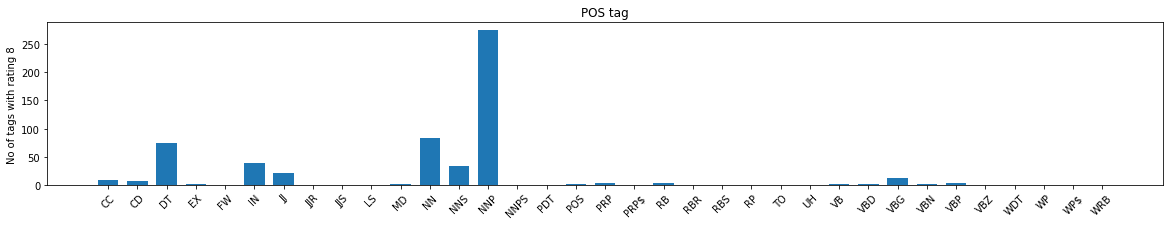

In [ ]:
plt.figure(figsize=(20, 3)) 
y_pos = np.arange(len(array_of_tags))
plt.bar(y_pos, array_for_eights,0.7, align='center', alpha=1)
plt.xticks(rotation=45)
plt.xticks(y_pos, array_of_tags)
plt.ylabel('No of tags with rating 8')
plt.title('POS tag')

Text(0.5, 1.0, 'POS tag')

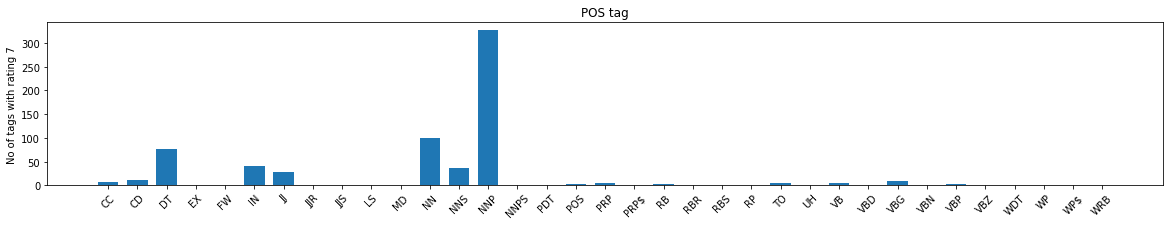

In [ ]:
plt.figure(figsize=(20, 3)) 
y_pos = np.arange(len(array_of_tags))
plt.bar(y_pos, array_for_sevens,0.7, align='center', alpha=1)
plt.xticks(rotation=45)
plt.xticks(y_pos, array_of_tags)
plt.ylabel('No of tags with rating 7')
plt.title('POS tag')

Text(0.5, 1.0, 'POS tag')

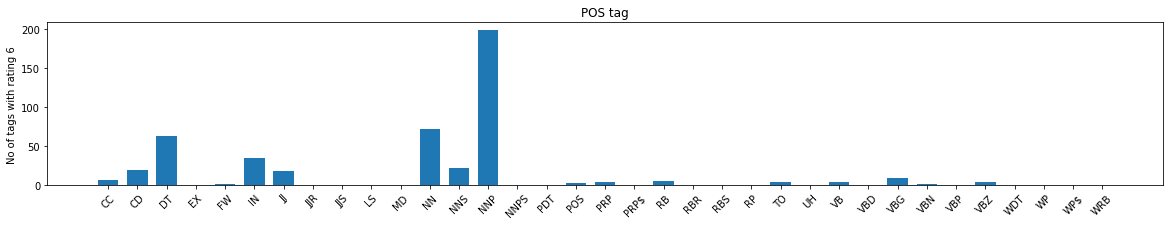

In [ ]:
plt.figure(figsize=(20, 3)) 
y_pos = np.arange(len(array_of_tags))
plt.bar(y_pos, array_for_sixes,0.7, align='center', alpha=1)
plt.xticks(rotation=45)
plt.xticks(y_pos, array_of_tags)
plt.ylabel('No of tags with rating 6')
plt.title('POS tag')

One way to represent the text is to convert sentences into embeddings vectors. We can use a pre-trained text embedding as the first layer, which will have two advantages:

*   we don't have to worry about text preprocessing,
*   we can benefit from transfer learning.
For this example we will use a model from TensorFlow Hub called google/nnlm-en-dim50/2.

Link: https://www.tensorflow.org/hub/tutorials/tf2_text_classification

In [ ]:
import tensorflow_hub as hub
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(X_val_numpy[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[-1.56222895e-01,  6.43003732e-02, -1.68057546e-01,
         7.08885416e-02,  3.10888499e-01, -2.52496619e-02,
        -2.73811013e-01,  1.95873961e-01, -1.57374382e-01,
        -2.95143396e-01, -1.56194404e-01,  1.24479011e-01,
        -1.27640245e-02, -2.07623899e-01,  3.65262255e-02,
        -2.88017672e-02,  2.27471828e-01, -9.00218785e-02,
        -1.16893940e-01,  2.26537749e-01, -9.40350257e-03,
         6.04702206e-03, -1.83791921e-01, -9.85555500e-02,
         2.05278277e-01, -4.70091999e-01, -9.22606513e-03,
         1.17417879e-01, -3.50827649e-02, -1.46342263e-01,
         8.67233649e-02, -7.12229088e-02, -2.25636944e-01,
         2.07926072e-02,  4.75741297e-01, -1.02642037e-01,
         2.84722149e-01,  2.06343979e-01, -5.64747602e-02,
        -1.69357777e-01,  1.31777255e-02,  1.88045830e-01,
        -5.99641353e-02,  7.97135476e-03, -7.17259794e-02,
         2.08437815e-03,  3.25423181e-01, -7.14487350e-03,
       

The layers are stacked sequentially to build the classifier:


1.   The first layer is a TensorFlow Hub layer. This layer uses a pre-trained Saved Model to map a sentence into its embedding vector. The model that we are using (google/nnlm-en-dim50/2) splits the sentence into tokens, embeds each token and then combines the embedding. The resulting dimensions are: (num_examples, embedding_dimension).
2.   This fixed-length output vector is piped through a fully-connected (Dense) layer with 4 hidden units.


3.   This fixed-length output vector is piped through a fully-connected (Dense) layer with 8 hidden units.
4.   This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.
5.   The last layer is densely connected with 10 output nodes. 





In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
#model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(Dense(10))

model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=256,
                    validation_data=(x_val_tensor, y_val_tensor),
                    verbose=1)

In [ ]:
results = model.evaluate(x_test, y_test)

print(results)

Here inputs are encoded with one hot encoding and not hub layer:
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/



In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in partial_x_train_numpy]
encoded_docs_test = [one_hot(d, vocab_size) for d in x_test_numpy]
#print(X_val_numpy)
print(encoded_docs)

# pad documents to a max length of 7 words(tokens)
max_length = 7
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')
print(padded_docs[:3])
print(padded_docs_test[:3])

In [ ]:
# define the model

model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
# compile the model

#model.compile(tf.keras.optimizers.Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, partial_y_train_numpy, epochs=400, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs_test, y_test_numpy, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Link: https://www.tensorflow.org/text/guide/word_embeddings

In [ ]:


# Vocabulary size and number of words in a sequence.
vocab_size = 50
sequence_length = 7

# Use the text vectorization layer to normalize, split, and map strings to
# integers. Note that the layer uses the custom standardization defined above.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.

vectorized=vectorize_layer.adapt(partial_x_train_numpy)

print(vectorized)

In [ ]:
embedding_dim=7

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(8, activation='relu'),
  Dense(10, activation='sigmoid')
])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=256,
                    validation_data=(x_val_tensor, y_val_tensor),
                    verbose=1)

In [ ]:
y_val_linear = tf.convert_to_tensor(np.array(list_float_ratings_numpy_linear[:100]))
y_test_linear_numpy=np.array(list_float_ratings_numpy_linear[100:200])
y_test_linear= tf.convert_to_tensor(y_test_linear_numpy)
partial_y_train_linear = tf.convert_to_tensor(np.array(list_float_ratings_numpy_linear[200:]))


In [ ]:
#try linear regression on this data 

#Linear regression

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

reg = LinearRegression().fit(padded_docs,partial_y_train_linear)


y_pred=reg.predict(padded_docs_test)
#print(y_pred)
#print(y_val_linear_regression[0])
# Plot outputs
for ind, pred in enumerate(y_pred):
  print("Predicted: "+str(pred)+" true value:"+ str(y_test_linear_numpy[ind]))